### Zhiyuan's Solution

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import scipy.linalg

np.random.seed(0)
%matplotlib inline

# Problem 1: Clustering

In [5]:
iris = np.genfromtxt('data/iris.txt', delimiter=None)

## Q1

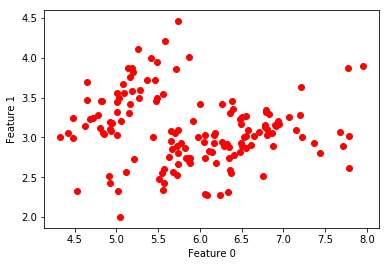

In [9]:
X = iris[:,0:2]

plt.scatter(X[:,0], X[:,1], color = 'r')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

## Q2

k = 2

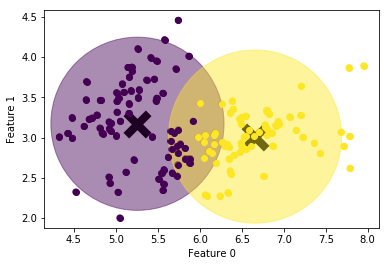

In [17]:
z, mu, ssd = ml.cluster.kmeans(X, K=2, init='k++', max_iter=100)
ml.plotClassify2D(None,X,z)

plt.scatter(X[:, 0], X[:, 1], c=z) # Plotting the data
plt.scatter(mu[:, 0], mu[:, 1], s=500, marker='x', facecolor='black', lw=8) # Plotting the centroids
plt.scatter(mu[:, 0], mu[:, 1], s=30000, alpha=.45, c=np.unique(z)) # Lazy way of plotting the clusters area :)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

k = 5

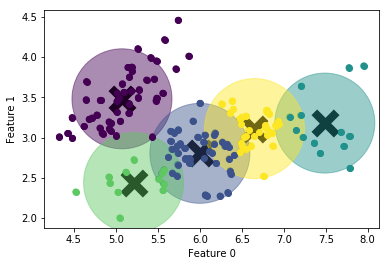

In [19]:
z, mu, ssd = ml.cluster.kmeans(X, K=5, init='k++', max_iter=100)
ml.plotClassify2D(None,X,z)

plt.scatter(X[:, 0], X[:, 1], c=z) # Plotting the data
plt.scatter(mu[:, 0], mu[:, 1], s=500, marker='x', facecolor='black', lw=8) # Plotting the centroids
plt.scatter(mu[:, 0], mu[:, 1], s=10000, alpha=.45, c=np.unique(z)) # Lazy way of plotting the clusters area :)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

k = 20

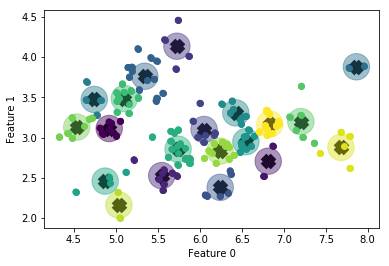

In [23]:
z, mu, ssd = ml.cluster.kmeans(X, K=20, init='k++', max_iter=100)
ml.plotClassify2D(None,X,z)

plt.scatter(X[:, 0], X[:, 1], c=z) # Plotting the data
plt.scatter(mu[:, 0], mu[:, 1], s=100, marker='x', facecolor='black', lw=8) # Plotting the centroids
plt.scatter(mu[:, 0], mu[:, 1], s=700, alpha=.45, c=np.unique(z)) # Lazy way of plotting the clusters area :)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

## Q3

k = 2

<function matplotlib.pyplot.show(*args, **kw)>

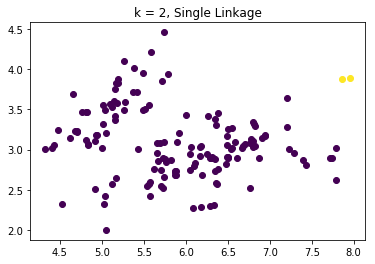

In [24]:
z, c = ml.cluster.agglomerative(X, 2, method='min')
ml.plotClassify2D(None,X,z)

plt.title('k = 2, Single Linkage')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

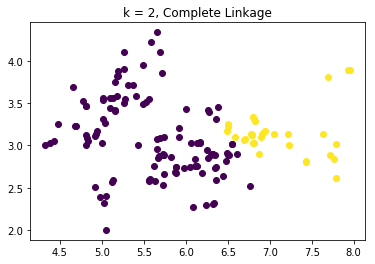

In [26]:
z, c = ml.cluster.agglomerative(X, 2, method='max')
ml.plotClassify2D(None,X,z)

plt.title('k = 2, Complete Linkage')
plt.show

k = 5

<function matplotlib.pyplot.show(*args, **kw)>

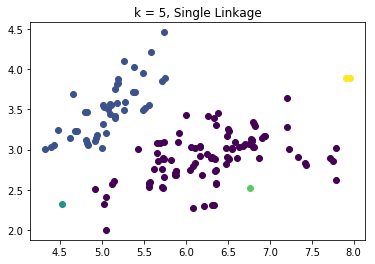

In [25]:
z, c = ml.cluster.agglomerative(X, 5, method='min')
ml.plotClassify2D(None,X,z)

plt.title('k = 5, Single Linkage')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

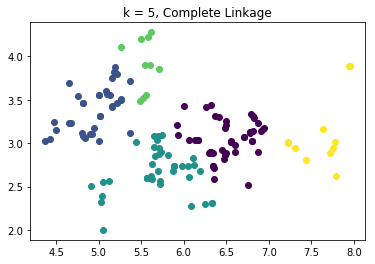

In [29]:
z, c = ml.cluster.agglomerative(X, 5, method='max')
ml.plotClassify2D(None,X,z)

plt.title('k = 5, Complete Linkage')
plt.show

k = 20

<function matplotlib.pyplot.show(*args, **kw)>

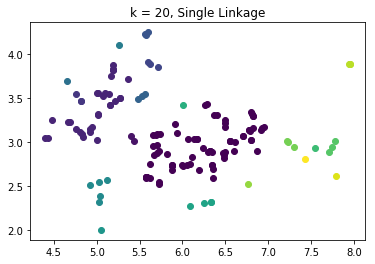

In [30]:
z, c = ml.cluster.agglomerative(X, 20, method='min')
ml.plotClassify2D(None,X,z)

plt.title('k = 20, Single Linkage')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

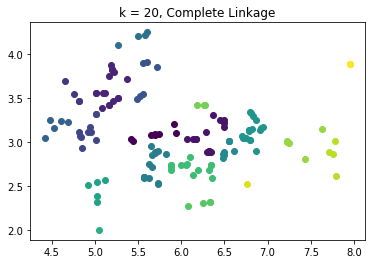

In [31]:
z, c = ml.cluster.agglomerative(X, 20, method='max')
ml.plotClassify2D(None,X,z)

plt.title('k = 20, Complete Linkage')
plt.show

## Q4

In both kinds of clustering, points are grouped into catagories. In each catagory, the points are relatively close to each other. 

However, in agglomerative clustering, there are some clusters with extremely small number of points and some with many points, while in K-means, each cluster has roughly the same size. 

# Problem 2: EigenFaces

## Q1

(4916, 576)


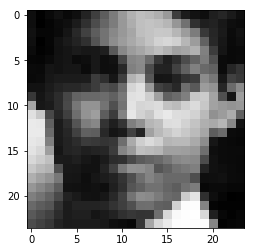

In [38]:
mu = np.mean(X)
X0 = X - mu

print(X0.shape)

X = np.genfromtxt("data/faces.txt", delimiter=None) # load face dataset 
plt.figure() # pick a data point i for display
img = np.reshape(X0[5,:],(24,24)) # convert vectorized data to 24x24 image patches
plt.imshow(img.T , cmap="gray") # display image patch; you may have to squint

## Q2

In [41]:
U, S, V = scipy.linalg.svd(X0, full_matrices = False)
W = U.dot(np.diag(S))

print(W.shape)
print(V.shape)

(4916, 576)
(576, 576)


## Q3

[2465.915252687558, 1731.142532445829, 1413.0932957824566, 1248.4288215715092, 1106.5645688183095, 1015.8604245366287, 940.218724905595, 870.8898980704487, 819.5686398124661, 776.5783778336007, 736.6968053471978, 699.130487149125]


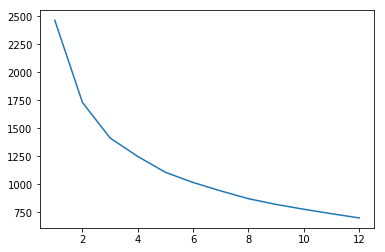

In [46]:
MSE = list()
for K in range(1, 13):
    X0hat = W[:,:K].dot(V[:K,:])
    MSE.append(np.mean((X0 - X0hat)**2))
    
xaxis = range(1, 13)

plt.plot(xaxis, MSE)
    
print(MSE)

## Q4

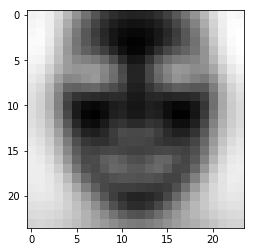

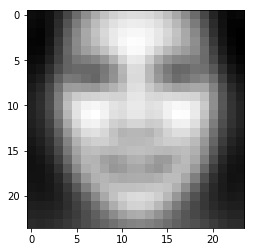

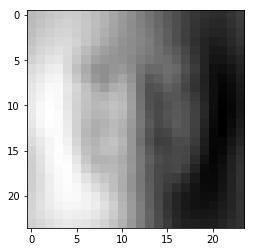

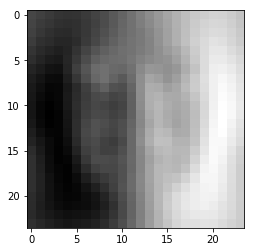

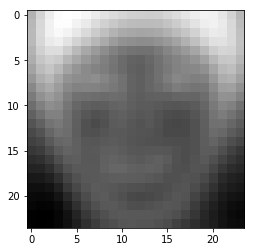

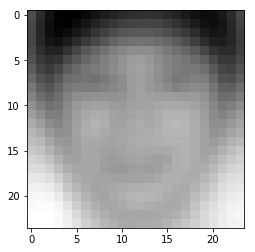

In [50]:
for j in range(1, 4):
    alpha = 2 * np.median(np.abs(W[:,j]))
    img1 = np.reshape((mu + alpha*V[j,:]), (24,24))
    img2 = np.reshape((mu - alpha*V[j,:]), (24,24))
    
    plt.imshow(img1.T , cmap="gray")
    plt.show()
    plt.imshow(img2.T , cmap="gray")
    plt.show()

## Q6

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


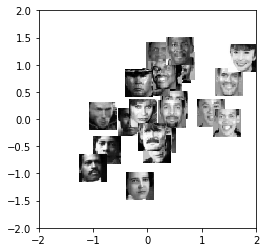

In [51]:
idx = range(1, 26) # pick some data (randomly or otherwise); an array of integer indices

import mltools.transforms
coord,params = ml.transforms.rescale( W[:,0:2] ) # normalize scale of "W" locations
plt.figure(); plt.hold(True); # you may need this for pyplot 
for i in idx: # compute where to place image (scaled W values) & size
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square 
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image 
    plt.axis( (-2,2,-2,2) ) # set axis to a reasonable scale

I did this homework alone. 